In [1]:
import tensorflow as tf

In [2]:
manist_data = tf.keras.datasets.fashion_mnist

In [3]:
(training_images,training_labels), (testing_images,testing_labels) = manist_data.load_data()
print("Training data size is",len(training_images))
print("testing data size is",len(testing_images))

Training data size is 60000
testing data size is 10000


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

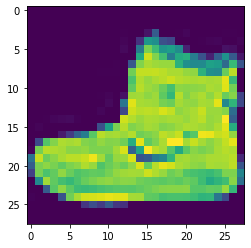

In [7]:
import numpy as np
np.set_printoptions(linewidth=150)
import matplotlib.pyplot as plt

# Graphical image of picture
plt.imshow(training_images[0])
print(training_labels[0])

# As array of pixel values 
print(training_images[0])

In [7]:
training_images = training_images/255.0
testing_images = testing_images/255.0

In [10]:
# class myCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#     if(logs.get('accuracy')<0.95):
#       print("\nReached 90% accuracy so cancelling training!")
#       self.model.stop_training = True
        
# callbacks = myCallback()
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(512, activation = tf.nn.relu),
                             #tf.keras.layers.Dense(128, activation = tf.nn.relu),
                             tf.keras.layers.Dense(10, activation = tf.nn.softmax)])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer= tf.optimizers.Adam(), 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
# model.compile(optimizer = tf.optimizers.Adam(),
#               loss = 'sparse_categorical_crossentropy',
#               metrics=['accuracy'])
model.fit(training_images,training_labels, epochs=12) #,callbacks=[callbacks])

Epoch 1/12
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2146 - accuracy: 0.9200
Epoch 2/12
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2074 - accuracy: 0.9222
Epoch 3/12
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1962 - accuracy: 0.9259
Epoch 4/12
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1906 - accuracy: 0.9279
Epoch 5/12
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1854 - accuracy: 0.9287
Epoch 6/12
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1785 - accuracy: 0.9329
Epoch 7/12
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1731 - accuracy: 0.9345
Epoch 8/12
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1682 - accuracy: 0.9373
Epoch 9/12
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1618 - accuracy: 0.9390
Epoch 10/12
1875/1875 [==============================] - 12s 7ms/step - l

In [21]:
# Testing our model on new images that it never seen
model.evaluate(testing_images,testing_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3806 - accuracy: 0.8938


[0.38057899475097656, 0.8938000202178955]

In [37]:
classifications = model.predict(testing_images).argmax(axis=1)
print(classifications)
len(classifications)

[1 6 9 ... 8 1 8]


10000

In [31]:
# For sample examples
print("predicted label is",classifications[3])
print("correct label is",testing_labels[3])

print("predicted label is",classifications[364])
print("correct label is",testing_labels[364])

print("predicted label is",classifications[573])
print("correct label is",testing_labels[573])

predicted label is 1
correct label is 1
predicted label is 4
correct label is 4
predicted label is 7
correct label is 7


[[850   3  19   9   6   3 106   0   4   0]
 [  2 989   1   3   2   0   2   0   1   0]
 [ 12   2 801   5 113   0  67   0   0   0]
 [ 32  18  15 875  22   1  34   0   3   0]
 [  0   0  63  35 824   0  77   0   1   0]
 [  0   0   0   1   0 980   0  11   1   7]
 [112   0  90  19  49   0 725   0   5   0]
 [  0   0   0   0   0  12   0 955   0  33]
 [  7   2   8   1   4   3   5   2 968   0]
 [  0   0   0   1   0   8   1  19   0 971]]


Text(69.0, 0.5, 'Truth')

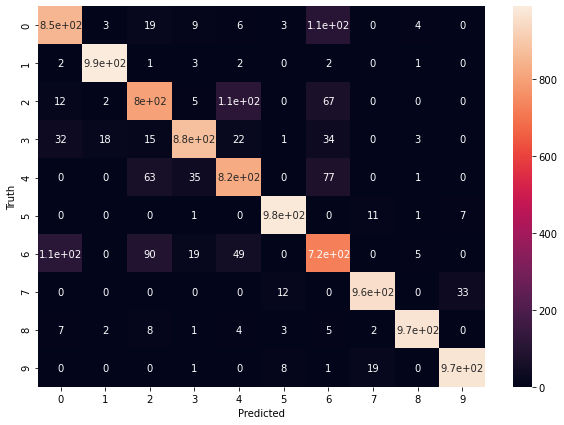

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testing_labels,classifications)
print(cm)

#for better visualisation
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')